### Importando librerias

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Importando datos corregidos hasta la fecha


In [3]:
raw_csv_data = pd.read_csv("Index_united.csv")

In [4]:
df_comp = raw_csv_data.copy()
df_comp.set_index(df_comp.date,inplace=True)

### Examinacion de la Data

In [5]:
df_comp.head()

,Unnamed: 0,date,spx,dax,ftse,nikkei
date,,,,,,
07/01/1994,0,07/01/1994,469.90,2224.95,3445.98,18124.01
10/01/1994,1,10/01/1994,475.27,2225.00,3440.58,18443.44
11/01/1994,2,11/01/1994,474.13,2228.10,3413.77,18485.25
12/01/1994,3,12/01/1994,474.17,2182.06,3372.02,18793.88
13/01/1994,4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [6]:
#Muestra de las columnas del dataframe
df_comp.columns

Index(['Unnamed: 0', 'date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [7]:
df_comp.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,7752.000000,7752.000000,7752.000000,7752.000000
mean,1723.576196,7498.407811,5748.635567,16649.531575
std,1040.265768,3893.125784,1251.664602,5794.663737
min,438.920000,1911.700000,2876.600000,7054.980000
25%,1085.027500,4495.042500,4904.747500,11359.932500
50%,1330.646624,6494.305000,5925.315000,16413.775000
75%,2106.682447,10676.682500,6695.818232,20224.452500
max,4796.560059,16469.750000,8014.299805,33753.328125


In [9]:
#Verificacion de nulos
df_comp.isna() 

,date,spx,dax,ftse,nikkei
date,,,,,
07/01/1994,False,False,False,False,False
10/01/1994,False,False,False,False,False
11/01/1994,False,False,False,False,False
12/01/1994,False,False,False,False,False
13/01/1994,False,False,False,False,False
...,...,...,...,...,...
2023-10-04,False,False,False,False,False
2023-10-05,False,False,False,False,False
2023-10-06,False,False,False,False,False


In [10]:
df_comp.spx.isna().sum()

0

In [11]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7752 entries, 07/01/1994 to 2023-10-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7752 non-null   object 
 1   spx     7752 non-null   float64
 2   dax     7752 non-null   float64
 3   ftse    7752 non-null   float64
 4   nikkei  7752 non-null   float64
dtypes: float64(4), object(1)
memory usage: 363.4+ KB


#### Conversion de los datos de la columna **date** en formato fecha

In [12]:
from datetime import datetime

date_string = "13/01/1994"
format = "%d/%m/%Y"

try:
    date = datetime.strptime(date_string, format)
    print(date)
except ValueError as e:
    print("Error:", e)


1994-01-13 00:00:00


### Graficas de Series de tiempo de los datos **Index_United**

Grafica de Serie de tiempo de la cotizacion del precio sobre el activo financiero S&P 500 entre 1994 a 2023 

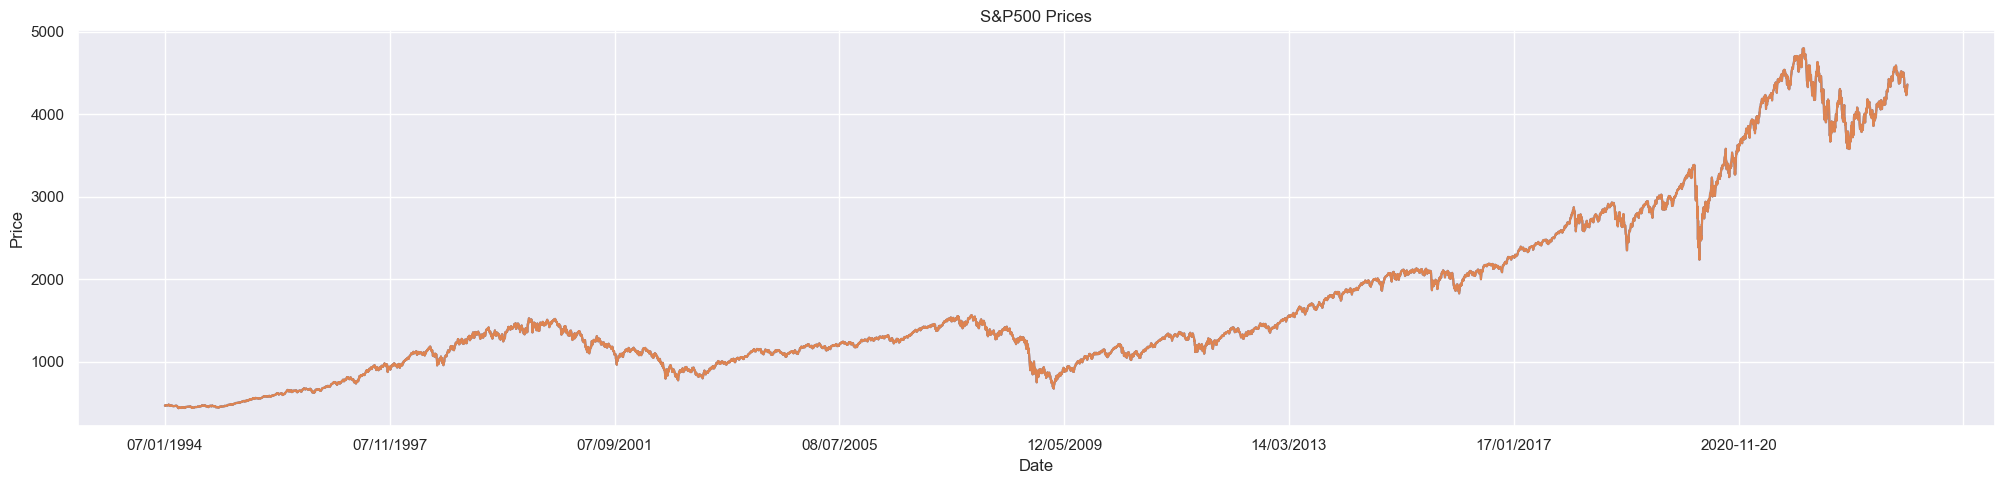

In [13]:
import matplotlib.dates as mdates
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp['spx'].plot()
plt.grid(True)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Grafica de Serie de tiempo de la cotizacion del precio sobre el activo financiero FTSE entre 1994 a 2023 

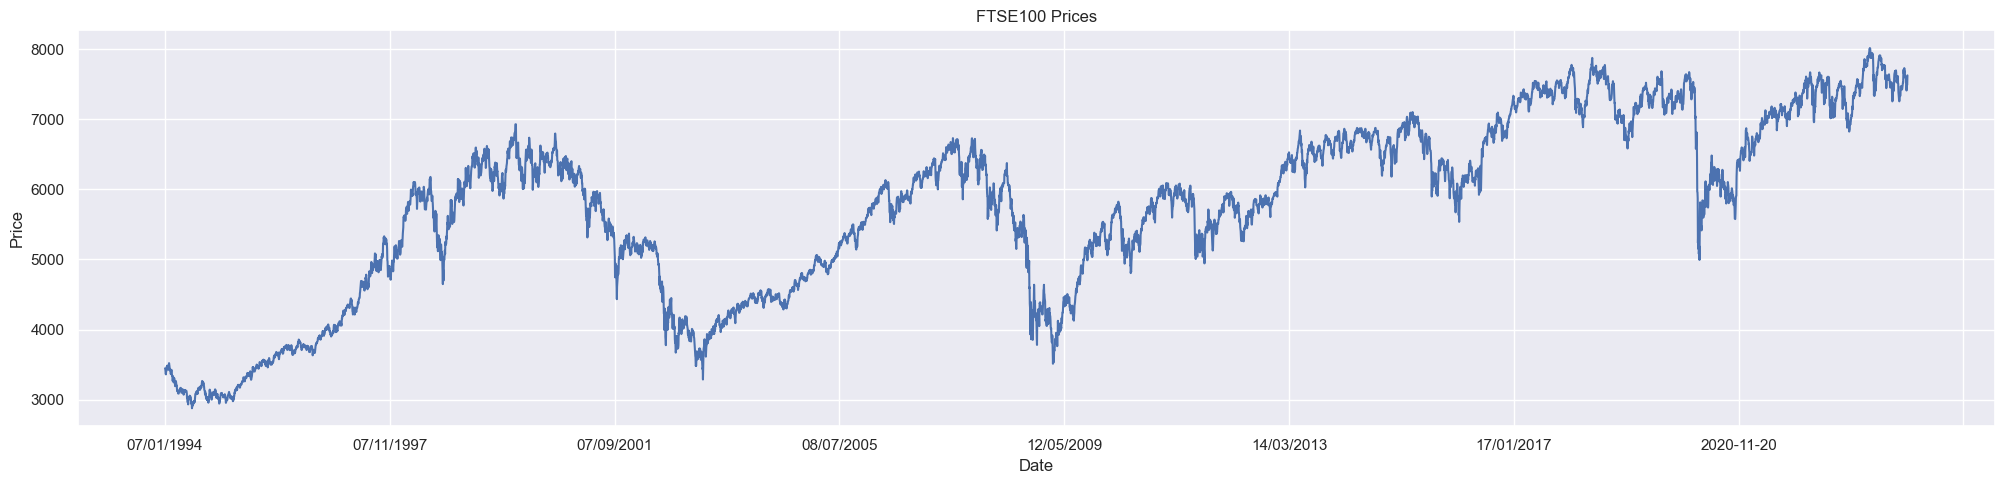

In [15]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.grid(True)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

Grafica de Serie de tiempo de la cotizaciones de los precios sobre los activos financieros S&P 500 versus FTSE entre 1994 a 2023 

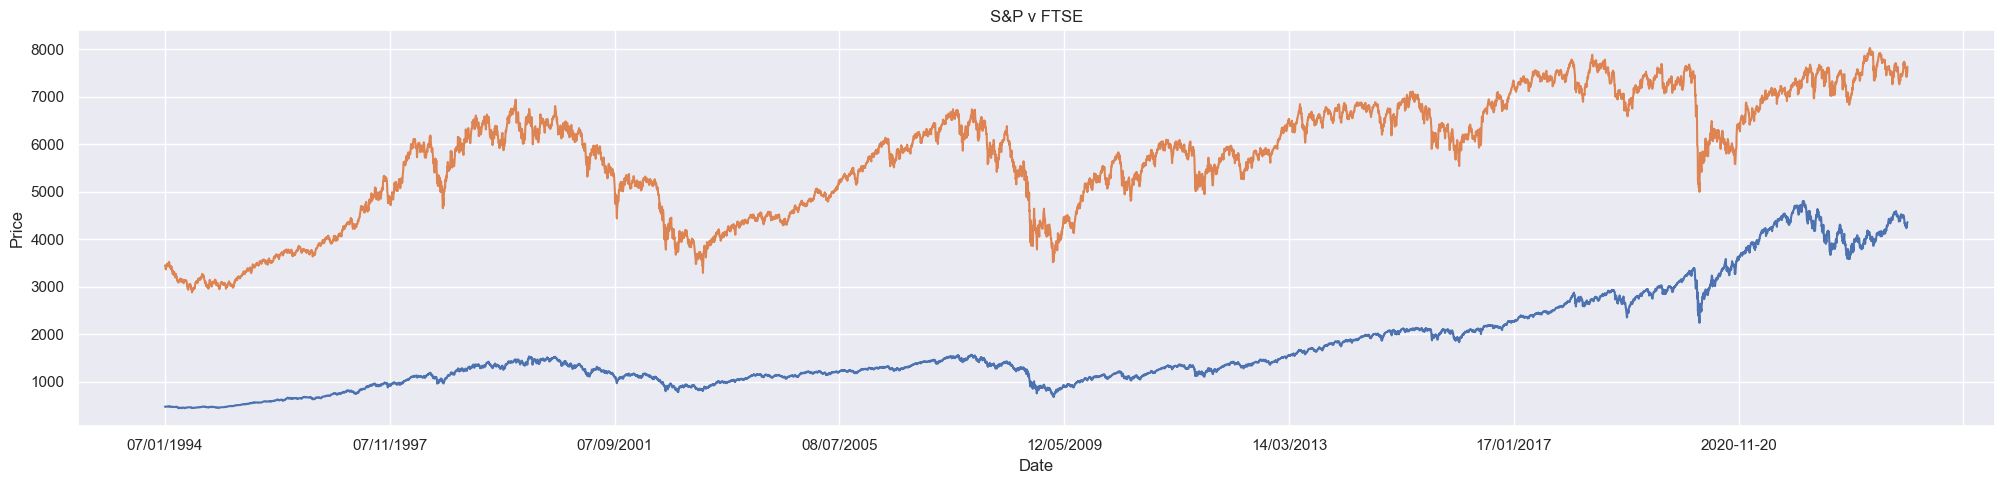

In [14]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.grid(True)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### The QQ Plot

In [16]:
import scipy.stats as sp
import pylab as pl

El grafico **QQ Plot** muestra la relacion de datos en cuanto a su distribucion teorica(normal o gaussina),sea un ajuste perfecto en la recta de 45°,no obstante muestra mayor sesgo de los datos en la cola derecha.

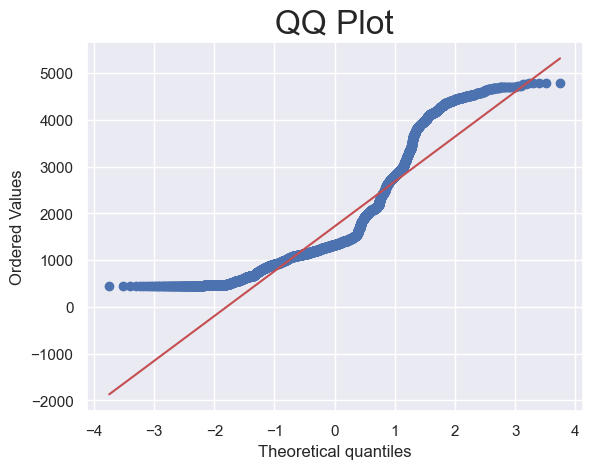

In [17]:
sp.probplot(df_comp.spx, plot = pl)
plt.title("QQ Plot", size = 24)
pl.show()